In [35]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [36]:
def generate_data(sample_size: int) -> tuple[np.ndarray, np.ndarray]:
    """
    Generate data for the sin function with noise.

    Args:
        sample_size (int): Sample size.

    Returns:
        tuple[np.ndarray, np.ndarray]: x and y.
    """
    x = np.random.rand(sample_size)
    y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.3, sample_size)
    return x, y

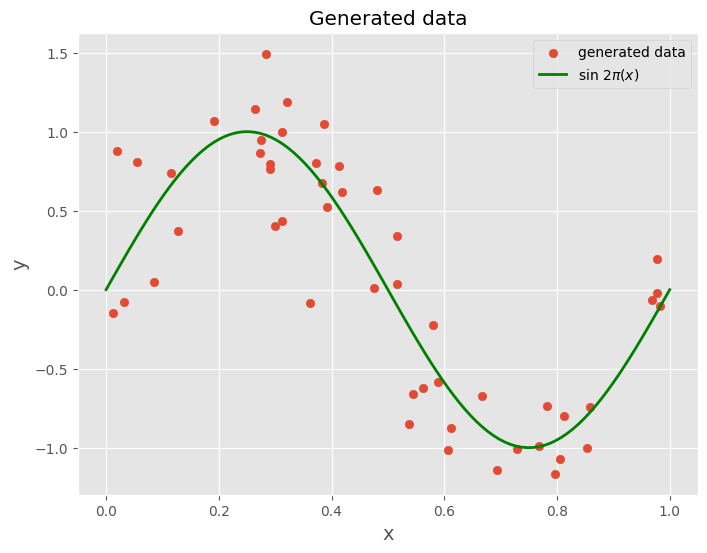

In [37]:
data_points = 50
x,y = generate_data(data_points)
plt.figure(figsize=(8, 6))
plt.scatter(x, y,label='generated data')
plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='green',lw=2,label='sin $2\\pi(x)$')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Generated data')
plt.legend()
plt.savefig('../blogposts/initial_generated_data.png')
plt.show()

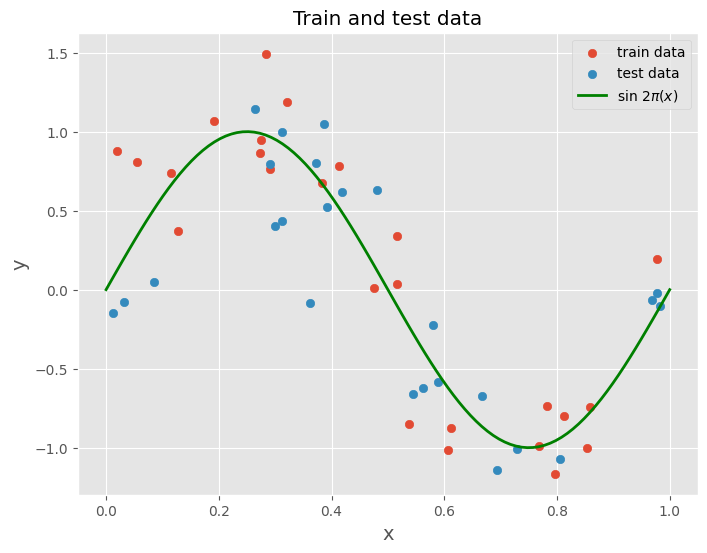

In [38]:
split = int(0.5 * data_points)
x_train = x[:split]
y_train = y[:split]
x_test = x[split:]
y_test = y[split:]

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label='train data')
plt.scatter(x_test, y_test, label='test data')
plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='green',lw=2,label='sin $2\\pi(x)$')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Train and test data')
plt.legend()
plt.savefig('../blogposts/train_test_data.png')
plt.show()

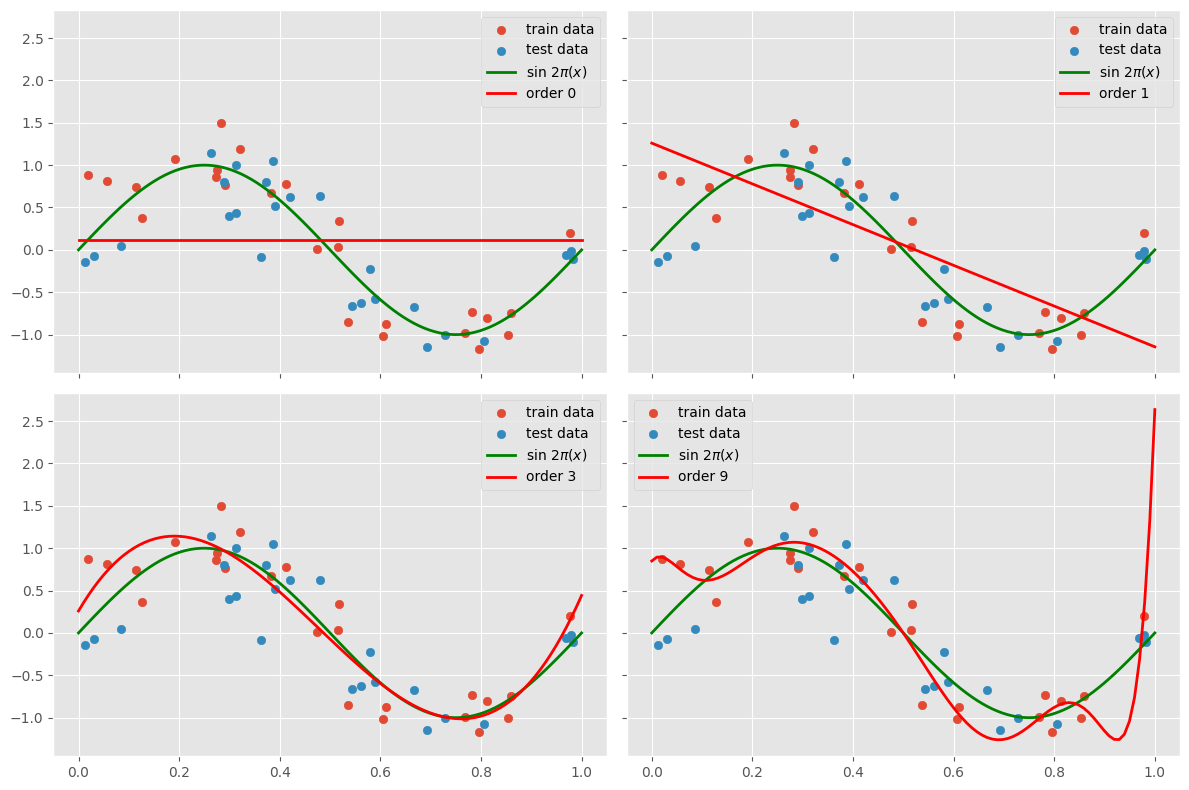

In [39]:
orders = [0,1,3,9]
rmse_train = []
rmse_test = []
coefficients = []
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

for i, order in enumerate(orders):
    ax = axs[i // 2, i % 2]
    ax.scatter(x_train, y_train, label='train data')
    ax.scatter(x_test, y_test, label='test data')
    ax.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='green', lw=2, label='sin $2\\pi(x)$')
    p = Polynomial.fit(x_train, y_train, order)
    y_train_pred = p(x_train)
    y_test_pred = p(x_test)
    rmse_train.append(np.sqrt(np.mean((y_train - y_train_pred) ** 2)))
    rmse_test.append(np.sqrt(np.mean((y_test - y_test_pred) ** 2)))
    coefficients.append(p.coef)
    ax.plot(np.linspace(0, 1, 100), p(np.linspace(0, 1, 100)), color='red', lw=2, label=f'order {order}')
    ax.legend()

plt.tight_layout()
plt.savefig('../blogposts/polynomial_fits.png')
plt.show()

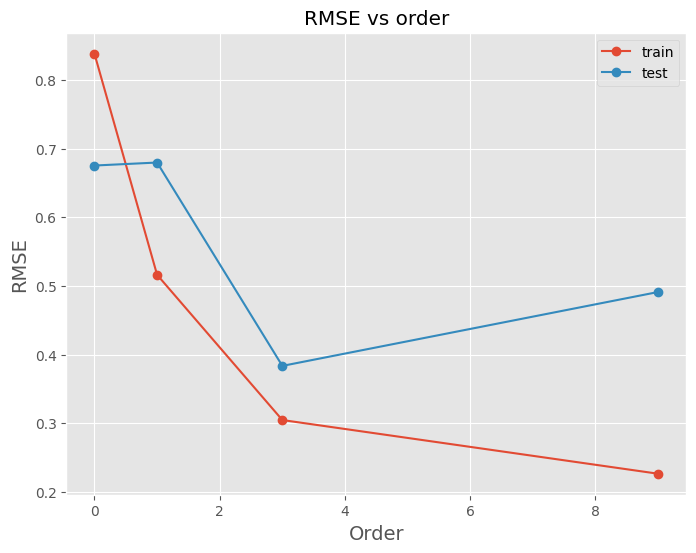

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(orders, rmse_train, marker='o', label='train')
plt.plot(orders, rmse_test, marker='o', label='test')
plt.xlabel('Order', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('RMSE vs order')
plt.legend()
plt.savefig('../blogposts/rmse_vs_order.png')
plt.show()

In [41]:
for i, order in enumerate(orders):
    print(f'Order: {order}, RMSE (train): {rmse_train[i]:.4f}, RMSE (test): {rmse_test[i]:.4f}')

Order: 0, RMSE (train): 0.8381, RMSE (test): 0.6753
Order: 1, RMSE (train): 0.5162, RMSE (test): 0.6796
Order: 3, RMSE (train): 0.3047, RMSE (test): 0.3835
Order: 9, RMSE (train): 0.2265, RMSE (test): 0.4911


In [42]:
for i, coef in enumerate(coefficients):
    print(f'Order: {orders[i]}, Coefficients: {coef}')

Order: 0, Coefficients: [0.11941504]
Order: 1, Coefficients: [ 0.06102459 -1.15146493]
Order: 3, Coefficients: [-0.06511999 -2.69902699  0.36666158  2.55591654]
Order: 9, Coefficients: [ 1.08414773e-02 -4.17947771e+00 -2.45869645e+00  7.26680257e+00
  1.52424608e+01  9.83486762e+00 -2.99539542e+01 -3.50059274e+01
  1.77062867e+01  2.17339983e+01]


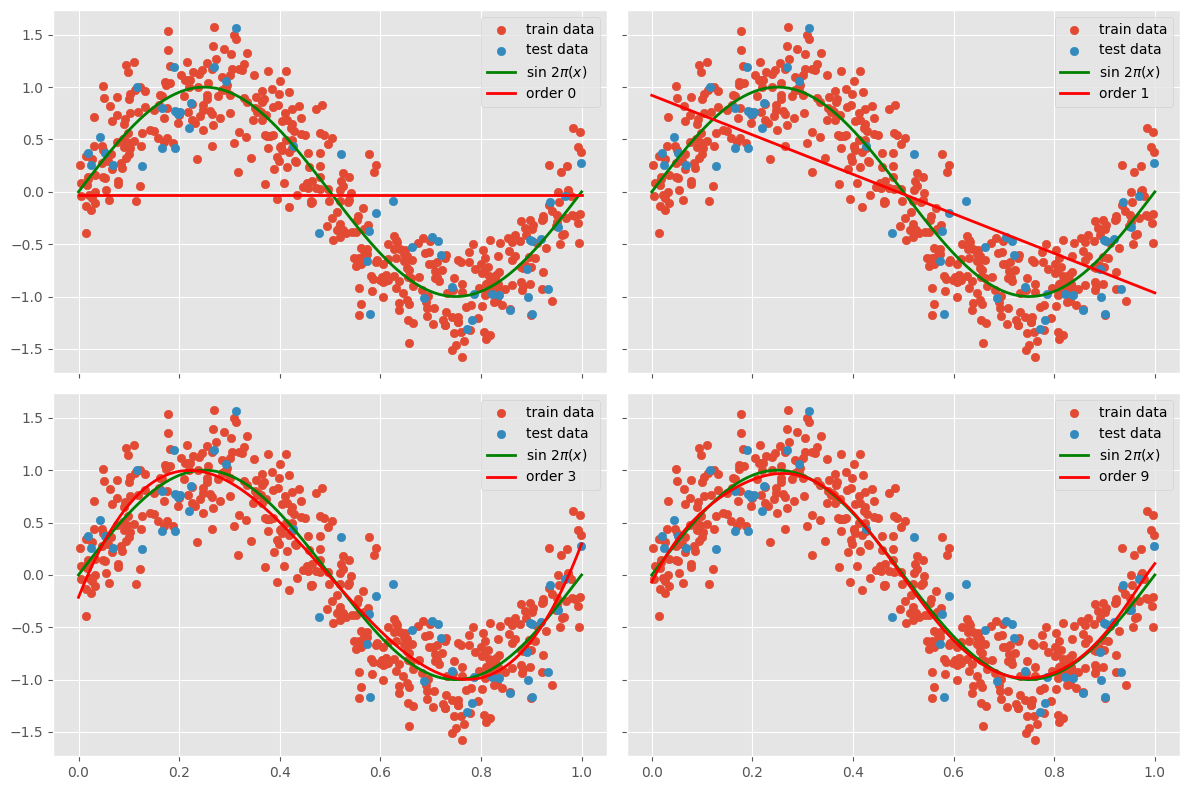

In [43]:
x_m,y_m = generate_data(500)
x_train_m = x_m[:450]
y_train_m = y_m[:450]
x_test_m = x_m[450:]
y_test_m = y_m[450:]

# fit a polynomial to the data and plot as subplots, share x and y axis
orders = [0,1,3,9]
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

for i, order in enumerate(orders):
    ax = axs[i // 2, i % 2]
    ax.scatter(x_train_m, y_train_m, label='train data')
    ax.scatter(x_test_m, y_test_m, label='test data')
    ax.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='green', lw=2, label='sin $2\\pi(x)$')
    p = Polynomial.fit(x_train_m, y_train_m, order)
    ax.plot(np.linspace(0, 1, 100), p(np.linspace(0, 1, 100)), color='red', lw=2, label=f'order {order}')
    ax.legend()

plt.tight_layout()
plt.savefig('../blogposts/polynomial_fits_more_data.png')
plt.show()


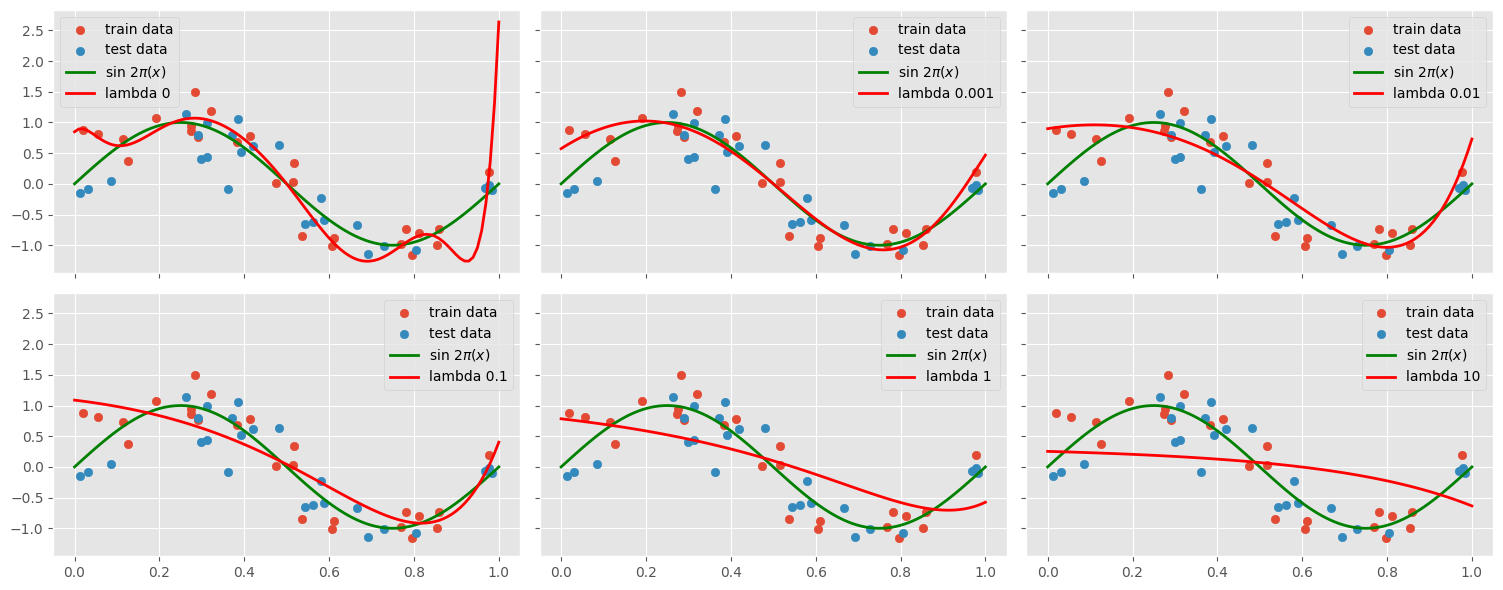

In [58]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
order = 9
lambda_ = [0, 1e-3, 1e-2, 1e-1, 1, 10]
rmse_train = []
rmse_test = []

fig,axs = plt.subplots(2,3,figsize=(15,6),sharex=True,sharey=True)

for i, lambda_reg in enumerate(lambda_):
    ax = axs[i // 3, i % 3]
    poly = PolynomialFeatures(order)
    x_train_poly = poly.fit_transform(x_train.reshape(-1,1))
    x_test_poly = poly.fit_transform(x_test.reshape(-1,1))
    ridge = Ridge(alpha=lambda_reg, fit_intercept=False)
    ridge.fit(x_train_poly, y_train)
    y_train_pred = ridge.predict(x_train_poly)
    y_test_pred = ridge.predict(x_test_poly)
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    ax.scatter(x_train, y_train, label='train data')
    ax.scatter(x_test, y_test, label='test data')
    ax.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='green', lw=2, label='sin $2\\pi(x)$')
    ax.plot(np.linspace(0, 1, 100), ridge.predict(poly.fit_transform(np.linspace(0, 1, 100).reshape(-1, 1)),), color='red', lw=2, label=f'lambda {lambda_reg}')
    ax.legend()

plt.tight_layout()
plt.savefig('../blogposts/ridge_regression.png')
plt.show()

In [57]:
for i, l in enumerate(lambda_):
    print(f'λ: {l}, RMSE (train): {rmse_train[i]:.4f}, RMSE (test): {rmse_test[i]:.4f}')

λ: 0, RMSE (train): 0.2265, RMSE (test): 0.4911
λ: 0.001, RMSE (train): 0.2882, RMSE (test): 0.4073
λ: 0.01, RMSE (train): 0.3334, RMSE (test): 0.4656
λ: 0.1, RMSE (train): 0.3759, RMSE (test): 0.5030
λ: 1, RMSE (train): 0.5056, RMSE (test): 0.5516
λ: 10, RMSE (train): 0.7120, RMSE (test): 0.6168
